In [1]:
!wget http://www.gavrila.net/data/Daimler/bmvc13-flohr-gavrila/PedCut2013_SegmentationDataset.tar.gz

--2019-03-09 22:33:42--  http://www.gavrila.net/data/Daimler/bmvc13-flohr-gavrila/PedCut2013_SegmentationDataset.tar.gz
Resolving www.gavrila.net (www.gavrila.net)... 134.119.45.88, 2a00:1158:1000:300::558
Connecting to www.gavrila.net (www.gavrila.net)|134.119.45.88|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 54546195 (52M) [application/x-tar]
Saving to: ‘PedCut2013_SegmentationDataset.tar.gz’

PedCut2013_Segmenta 100%[===================>]  52.02M  18.9MB/s    in 2.8s    

2019-03-09 22:33:46 (18.9 MB/s) - ‘PedCut2013_SegmentationDataset.tar.gz’ saved [54546195/54546195]



In [0]:
!tar -xzf PedCut2013_SegmentationDataset.tar.gz

In [3]:
import os
import numpy as np
from skimage.transform import resize
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Lambda, Conv2D, Dense, Dropout, InputLayer, Flatten, MaxPool2D
import keras.backend as K

%matplotlib inline

data = {}
for root, dirs, files in os.walk('data'):
    if files:
        data[root] =files

for k, v in data.items():
    print("{} -> {} images".format(k, len(v)))

Using TensorFlow backend.


data/testData/left_disparity -> 300 images
data/testData/left_images -> 300 images
data/testData/left_groundTruth -> 300 images
data/completeData/left_disparity -> 785 images
data/completeData/left_images -> 785 images
data/completeData/left_groundTruth -> 785 images
data/validationData/left_disparity -> 30 images
data/validationData/left_images -> 30 images
data/validationData/left_groundTruth -> 30 images


In [4]:
x_train_dir = 'data/completeData/left_images'
y_train_dir = 'data/completeData/left_groundTruth'

img_height = 200
img_width = 125
h = int(img_height/4)
w = int(img_width/5)


n_channels = 3
m = len(data[x_train_dir])
# sample = plt.imread(os.path.join(x_train_dir, data[x_train_dir][0]))
# print(sample.shape)

x_train = np.empty((m, img_height, img_width, n_channels))
y_train = np.empty((m, h, w,1))
y_train_unrolled = np.empty((m, h*w))

for i in range(m):
    x_img_path = os.path.join(x_train_dir, data[x_train_dir][i])
    x_img = plt.imread(x_img_path)
    x_img = resize(x_img, (img_height, img_width))
    x_train[i,:,:,:] = x_img
    y_img_path = os.path.join(y_train_dir, data[y_train_dir][i])
    y_img = plt.imread(y_img_path)
    y_img = resize(y_img, (h,w))
    y_train[i,:,:,0] = y_img
    y_train_unrolled[i] = y_img.reshape((y_img.shape[0]*y_img.shape[1]))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


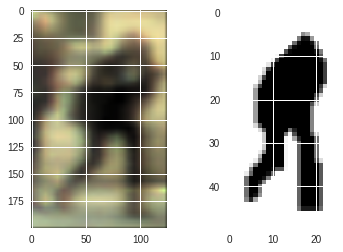

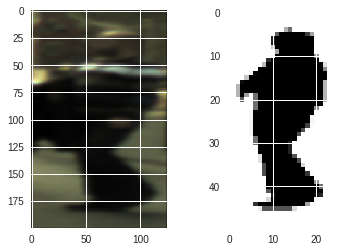

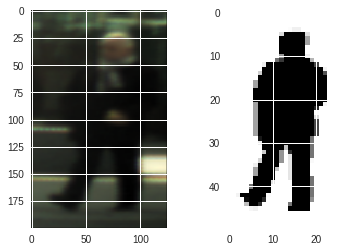

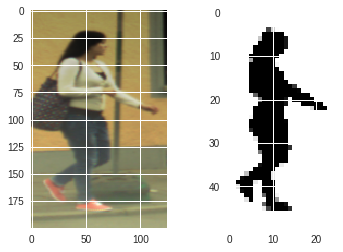

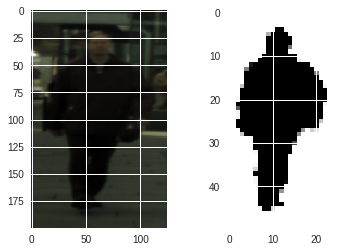

In [5]:
samples = np.random.randint(0,m,5)
for i in range(len(samples)):
    plt.figure()
    plt.subplot(1,2,1)
    plt.imshow(x_train[samples[i]])
    plt.subplot(1,2,2)
    plt.imshow(y_train[samples[i],:,:,0])

In [6]:
x_test_dir = 'data/testData/left_images'
y_test_dir = 'data/testData/left_groundTruth'

img_height = 200
img_width = 125
n_channels = 3
m = len(data[x_test_dir])
# sample = plt.imread(os.path.join(x_train_dir, data[x_train_dir][0]))
# print(sample.shape)

x_test = np.empty((m, img_height, img_width, n_channels))
y_test = np.empty((m, h, w,1))
y_test_unrolled = np.empty((m, h*w))

for i in range(m):
    x_img_path = os.path.join(x_test_dir, data[x_test_dir][i])
    x_img = plt.imread(x_img_path)
    x_img = resize(x_img, (img_height, img_width))
    x_test[i,:,:,:] = x_img
    y_img_path = os.path.join(y_test_dir, data[y_test_dir][i])
    y_img = plt.imread(y_img_path)
    y_img = resize(y_img, (h, w))
    y_test[i,:,:,0] = y_img
    y_test_unrolled[i] = y_img.reshape((y_img.shape[0]*y_img.shape[1]))

/usr/local/lib/python3.6/dist-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [7]:
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)
print(x_train.shape, y_train_unrolled.shape, x_test.shape, y_test_unrolled.shape)

(785, 200, 125, 3) (785, 50, 25, 1) (300, 200, 125, 3) (300, 50, 25, 1)
(785, 200, 125, 3) (785, 1250) (300, 200, 125, 3) (300, 1250)


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lambda_5 (Lambda)            (None, 200, 125, 3)       0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 200, 125, 32)      896       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 66, 41, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 66, 41, 16)        4624      
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 66, 41, 4)         580       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 22, 13, 4)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 1144)              0         
__________

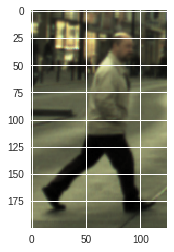

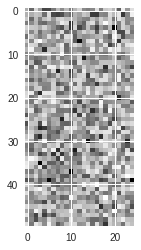

In [18]:
model = Sequential()
model.add(InputLayer(input_shape=(x_train.shape[1], x_train.shape[2], 3)))
model.add(Lambda(lambda x: (x - K.mean(x)) / K.std(x)))
model.add(Conv2D(32, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(3))
model.add(Conv2D(16, kernel_size=(3,3), padding='same', activation='relu'))
model.add(Conv2D(4, kernel_size=(3,3), padding='same', activation='relu'))
model.add(MaxPool2D(3))
model.add(Flatten())
model.add(Dense(16, activation='relu'))
model.add(Dense(1250, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

y_hat = model.predict(np.expand_dims(x_train[0],axis=0))
print(y_hat.shape)
y_hat = y_hat.reshape((1,h,w,1))
print(y_hat.shape)
plt.figure()
plt.imshow(x_train[0])
plt.figure()
plt.imshow(y_hat[0,:,:,0])

In [21]:
history = model.fit(x_train, y_train_unrolled, epochs=50, verbose=2)
# np.expand_dims(y_train_unrolled,axis=2)

Epoch 1/50
 - 1s - loss: 2918.8910
Epoch 2/50
 - 1s - loss: 2918.2863
Epoch 3/50
 - 1s - loss: 2918.1389
Epoch 4/50
 - 1s - loss: 2917.1709
Epoch 5/50
 - 1s - loss: 2916.4516
Epoch 6/50
 - 1s - loss: 2912.9844
Epoch 7/50
 - 1s - loss: 2908.4968
Epoch 8/50
 - 1s - loss: 2903.9932
Epoch 9/50
 - 1s - loss: 2900.4831
Epoch 10/50
 - 1s - loss: 2896.9809
Epoch 11/50
 - 1s - loss: 2894.2408
Epoch 12/50
 - 1s - loss: 2891.9525
Epoch 13/50
 - 1s - loss: 2889.4411
Epoch 14/50
 - 1s - loss: 2886.5525
Epoch 15/50
 - 1s - loss: 2884.8894
Epoch 16/50
 - 1s - loss: 2884.0170
Epoch 17/50
 - 1s - loss: 2881.8692
Epoch 18/50
 - 1s - loss: 2880.3799
Epoch 19/50
 - 1s - loss: 2879.4483
Epoch 20/50
 - 1s - loss: 2877.9138
Epoch 21/50
 - 1s - loss: 2876.6468
Epoch 22/50
 - 1s - loss: 2875.6423
Epoch 23/50
 - 1s - loss: 2874.6481
Epoch 24/50
 - 1s - loss: 2873.3772
Epoch 25/50
 - 1s - loss: 2873.1804
Epoch 26/50
 - 1s - loss: 2872.1428
Epoch 27/50
 - 1s - loss: 2870.8959
Epoch 28/50
 - 1s - loss: 2870.1760
E

(1, 1250)
(1, 50, 25, 1)


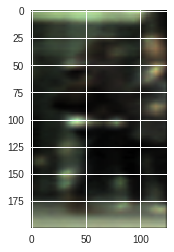

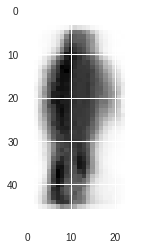

In [26]:
sample_id = 150
y_hat = model.predict(np.expand_dims(x_train[sample_id],axis=0))
print(y_hat.shape)
y_hat = y_hat.reshape((1,h,w,1))
print(y_hat.shape)
plt.figure()
plt.imshow(x_train[sample_id])
plt.figure()
plt.imshow(y_hat[0,:,:,0])